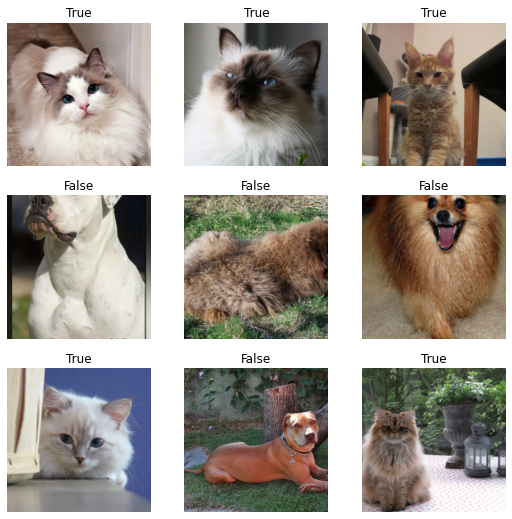

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

def label_func(f): return f[0].isupper()

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

dls.show_batch()


In [2]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [3]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.141323,0.029248,0.008796,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.051339,0.018504,0.008119,00:36


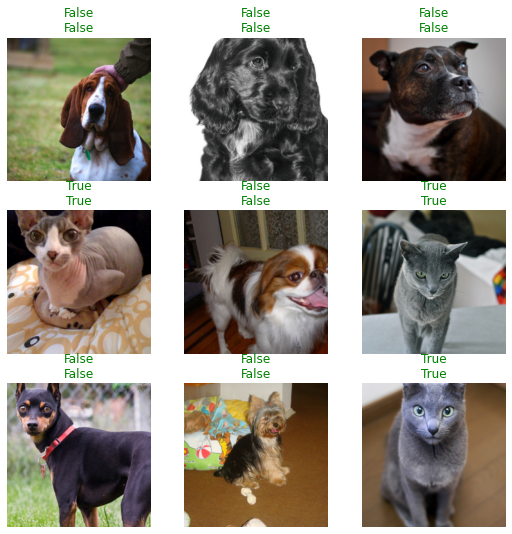

In [5]:
learn.show_results()

In [6]:
pat = r'^(.*)_\d+.jpg'

In [7]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

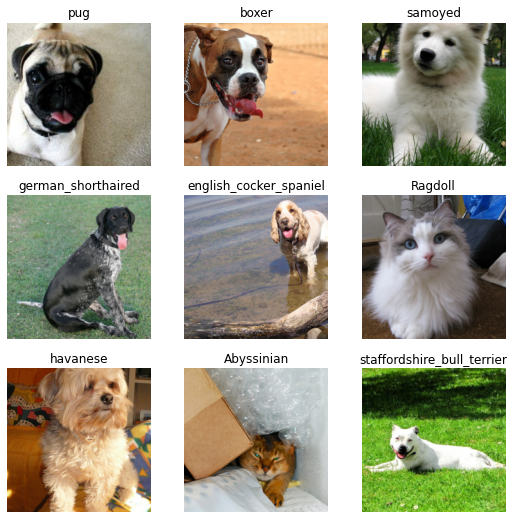

In [8]:
dls.show_batch()

In [9]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

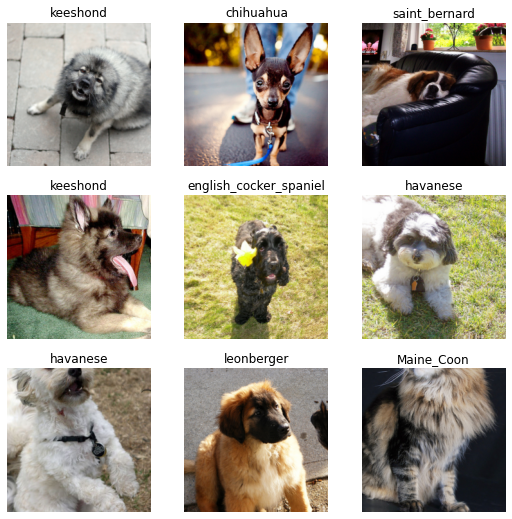

In [10]:
dls.show_batch()

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0030199517495930195)

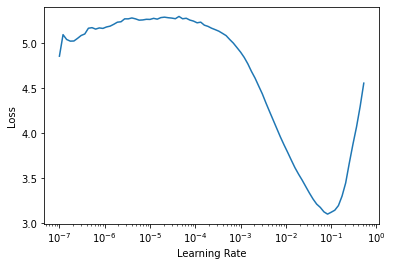

In [12]:
learn.lr_find()

In [14]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.261585,0.334561,0.103518,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.529284,0.446821,0.131258,00:40
1,0.327627,0.212021,0.067659,00:41


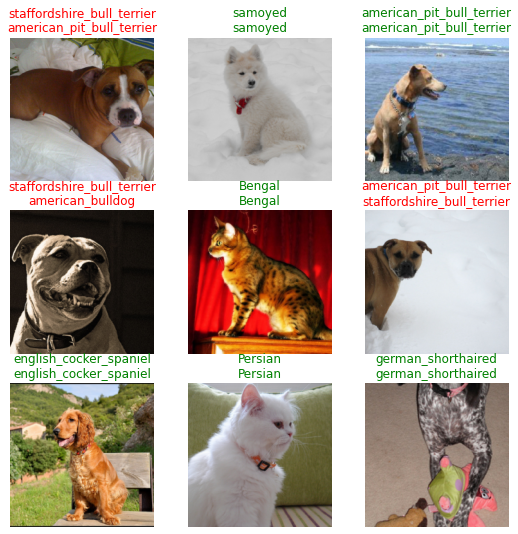

In [15]:
learn.show_results()

In [16]:
interp = Interpretation.from_learner(learn)

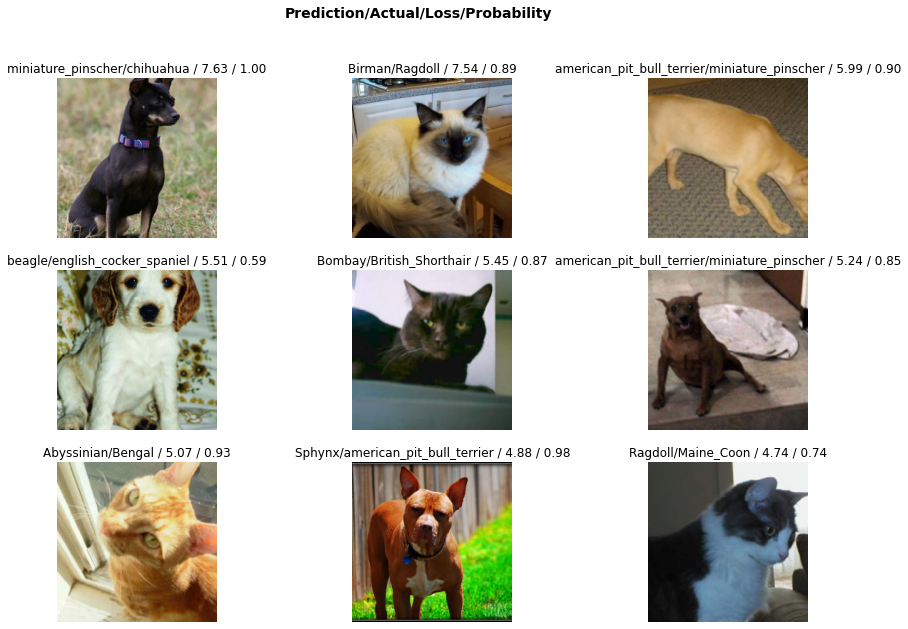

In [19]:
interp.plot_top_losses(9, figsize=(15,10))